In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data cleaning and Exploratory Data Analysis

In [8]:
#load data into pandas
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
#Cleaning data
df["department"] = df["department"].replace(["sweing"], ["sewing"])
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [15]:
#testing stuff
subdf = pd.DataFrame(df[["smv", "wip", "over_time", "incentive", "idle_time", "actual_productivity"]])
subdf

,smv,wip,over_time,incentive,idle_time,actual_productivity
0,26.16,1108.0,7080,98,0.0,0.940725
1,3.94,NaN,960,0,0.0,0.886500
2,11.41,968.0,3660,50,0.0,0.800570
3,11.41,968.0,3660,50,0.0,0.800570
4,25.90,1170.0,1920,50,0.0,0.800382
...,...,...,...,...,...,...
1192,2.90,NaN,960,0,0.0,0.628333
1193,3.90,NaN,960,0,0.0,0.625625
1194,3.90,NaN,960,0,0.0,0.625625
1195,2.90,NaN,1800,0,0.0,0.505889


<AxesSubplot:>

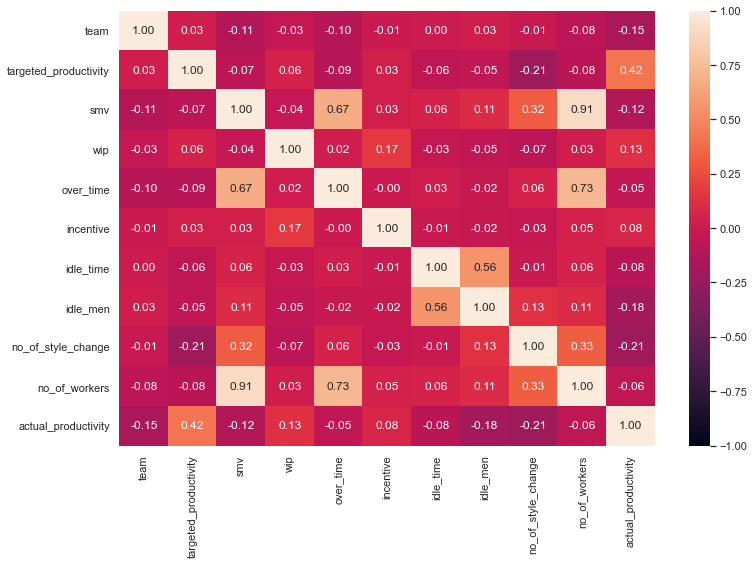

In [19]:
#Correlation heat map. 0 means no correlation. 1 means strong positive correlation. -1 means strong neg correlation
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot=True, fmt='.2

Bruh, whr the correlation? sianzz.
can consider deleting this

In [26]:
#Groups data by their team and each column represents the median of the team. 
#Cleans data a bit more
subdf = df.groupby('team').median()
subdf

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,,,,,,,,,,
1,0.80,22.52,1418.0,3600.0,30.0,0.0,0.0,0.0,56.5,0.850427
2,0.80,15.28,928.0,3000.0,0.0,0.0,0.0,0.0,45.0,0.800238
3,0.80,22.52,1129.0,6600.0,40.0,0.0,0.0,0.0,56.0,0.800511
4,0.75,22.52,864.0,6060.0,0.0,0.0,0.0,0.0,56.0,0.800393
5,0.70,20.79,699.0,6960.0,0.0,0.0,0.0,0.0,58.0,0.700618
6,0.75,11.61,913.0,3660.0,23.0,0.0,0.0,0.0,31.5,0.750651
7,0.75,23.54,970.0,5820.0,0.0,0.0,0.0,0.0,56.0,0.682975
8,0.70,15.09,1074.0,3360.0,0.0,0.0,0.0,0.0,52.0,0.700135
9,0.80,18.79,1149.5,3900.0,29.5,0.0,0.0,0.0,52.0,0.754346


<AxesSubplot:>

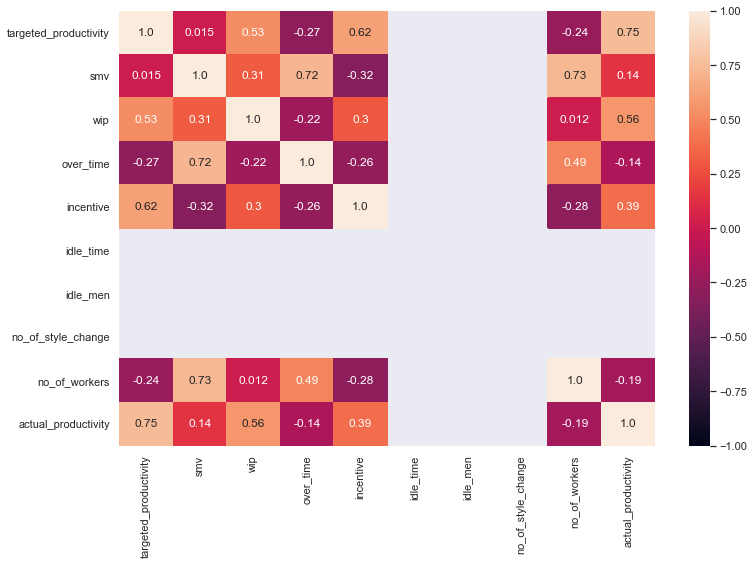

In [29]:
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(subdf.corr(), vmin = -1, vmax = +1, annot=True, fmt='.2')

In [34]:
subdf.drop(columns = "idle_time", inplace = True)
subdf.drop(columns = "idle_men", inplace = True)
subdf.drop(columns = "no_of_style_change", inplace = True)
subdf

,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
team,,,,,,,
1,0.80,22.52,1418.0,3600.0,30.0,56.5,0.850427
2,0.80,15.28,928.0,3000.0,0.0,45.0,0.800238
3,0.80,22.52,1129.0,6600.0,40.0,56.0,0.800511
4,0.75,22.52,864.0,6060.0,0.0,56.0,0.800393
5,0.70,20.79,699.0,6960.0,0.0,58.0,0.700618
6,0.75,11.61,913.0,3660.0,23.0,31.5,0.750651
7,0.75,23.54,970.0,5820.0,0.0,56.0,0.682975
8,0.70,15.09,1074.0,3360.0,0.0,52.0,0.700135
9,0.80,18.79,1149.5,3900.0,29.5,52.0,0.754346


<AxesSubplot:>

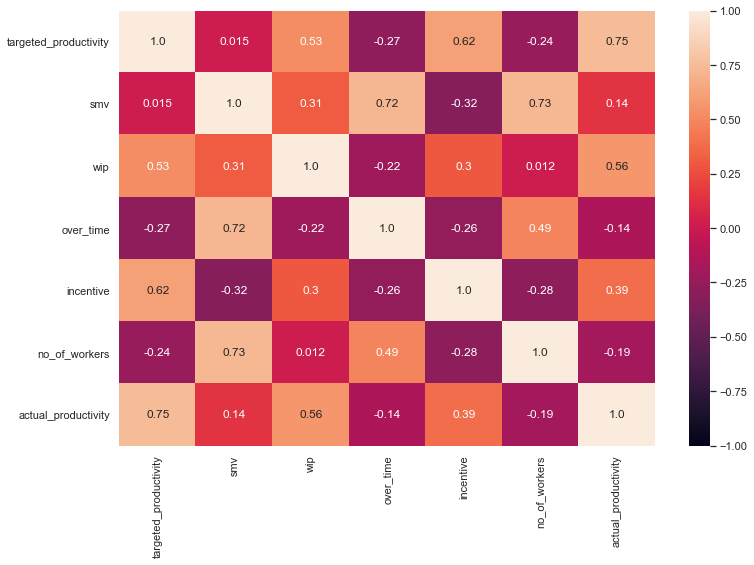

In [35]:
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(subdf.corr(), vmin = -1, vmax = +1, annot=True, fmt='.2')


SMV: Standard Minute Value, it is the allocated time for a task
WIP: Work in progress. Includes the number of unfinished items for products
Overtime: amount of overtime by each team in minutes
Incentive: amount of financial incentive (in BDT) that enables or motivates a particular course of action

Focus on the last row.
Can see that more incentive is positively correlated and over_time is negatively correlted with productivity
Means that we have to find the optimal incentive to give to boost production and ensure low overtime.
We will also test other stuff just in case

C:\Users\yeohw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actual_productivity', ylabel='Density'>

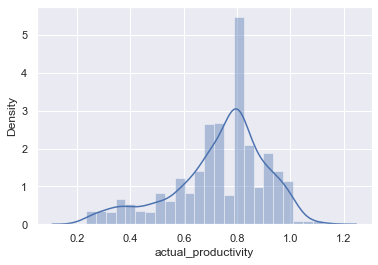

In [36]:
sns.distplot(df.actual_productivity)

# Machine Learning Model

In [63]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#Predictors
x = pd.DataFrame(df[["smv", "wip", "over_time", "incentive"]])

#To be tested against
y_original = df[['actual_productivity']]


In [64]:
#Checks for missing value
total_size = len(x)
for factor in x.columns:
    nan_count = len(x[factor].loc[x[factor].isna()])
    print(f'{factor} {round(100 * nan_count / total_size, 2)}%')

smv 0.0%
wip 42.27%
over_time 0.0%
incentive 0.0%


WIP has too many missing values, so we are dropping that column

In [65]:
#Predictors
#Predictors
X = pd.DataFrame(df[["smv", "over_time", "incentive"]])

In [66]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y_original)

#view transformed values
y



array([798, 715, 586, ..., 241, 141,  71], dtype=int64)

# Below is all copied code. My prev sem proj didnt work so ye. 


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [121]:
import pandas as pd
data = pd.read_csv("garments_worker_productivity.csv")

# changing error in sweing
data['department'] = data['department'].replace(['sweing'],['sewing'])

data.date = pd.to_datetime(data.date,dayfirst = False)
data[['month']] = pd.DataFrame(data.date.dt.month)
# data[['day']] = pd.DataFrame(data.date.dt.day)
data[['year']] = pd.DataFrame(data.date.dt.year)
data.drop(columns = ['date'],inplace = True)

from sklearn.preprocessing import PowerTransformer
p = PowerTransformer()
data['actual_productivity'] = p.fit_transform(data[['actual_productivity']])

x = data.iloc[:,0:15]
y = data[['actual_productivity']] 
x = data.drop(columns = ['actual_productivity'])


nominal_col = [0,1,2]
numeric_col = [3,4,9,10,11,13,14]
KBins_col = [5]
Bina_col = [7,8,12]
null_col = [6]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3) 

In [122]:
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,KBinsDiscretizer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse = False),nominal_col),
                                (PowerTransformer(),numeric_col),
                                (KBinsDiscretizer(),KBins_col),
                                (Binarizer(threshold = 55),Bina_col),
                                (SimpleImputer(),null_col),
                                 remainder = 'passthrough')
set_config(display = 'diagram')
trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [0, 1, 2]),
                                ('powertransformer', PowerTransformer(),
                                 [3, 4, 9, 10, 11, 13, 14]),
                                ('kbinsdiscretizer', KBinsDiscretizer(), [5]),
                                ('binarizer', Binarizer(threshold=55),
                                 [7, 8, 12]),
                                ('simpleimputer', SimpleImputer(), [6])])

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
algorithm = LinearRegression()
pipe = make_pipeline(trans,algorithm)


In [124]:
algorithm

LinearRegression()

In [125]:
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('linearregression', LinearRegression())])

In [126]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.pipeline import make_pipeline
algorithm_1 = Lasso()
algorithm_2 = Ridge()
pipe_1 = make_pipeline(trans,algorithm_1)
pipe_2 = make_pipeline(trans,algorithm_2)

In [127]:
algorithm_1

Lasso()

In [128]:
algorithm_2

Ridge()

In [129]:
pipe_1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('lasso', Lasso())])

In [130]:
pipe_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('ridge', Ridge())])

In [131]:
pipe.fit(x_train,y_train)

C:\Users\yeohw\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('linearregression', LinearRegression())])

In [132]:
pipe_1.fit(x_train,y_train)

C:\Users\yeohw\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('lasso', Lasso())])

In [133]:
pipe_2.fit(x_train,y_train)

C:\Users\yeohw\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('ridge', Ridge())])

In [134]:
pred = pipe.predict(x_test)
pred


array([[ 2.57929578e-01],
       [-6.50631245e-01],
       [ 6.92804197e-01],
       [-5.34357815e-01],
       [-5.05709677e-01],
       [-9.33350797e-01],
       [-1.95372396e-01],
       [-5.24893377e-01],
       [-2.42790501e-01],
       [-3.05082101e-01],
       [-2.28553671e-01],
       [ 1.11033504e-02],
       [-4.84290316e-01],
       [ 9.43728266e-01],
       [-1.36580053e-01],
       [-1.29851989e+00],
       [ 2.87769710e-01],
       [-3.27279588e-01],
       [ 3.54983466e-01],
       [ 3.26804684e-01],
       [-7.80997981e-01],
       [ 3.99949303e-01],
       [ 7.14376085e-02],
       [ 1.49367764e-01],
       [-2.05422150e-01],
       [-1.72922314e+00],
       [ 7.60911891e-01],
       [ 5.21015135e-01],
       [ 5.87004441e-02],
       [-4.62098378e-01],
       [ 4.38748094e-01],
       [ 1.40793649e-01],
       [ 4.55638043e-01],
       [-6.57931132e-01],
       [ 6.30985592e-01],
       [-1.76687213e-01],
       [-3.93065089e-01],
       [ 1.08398171e+00],
       [ 1.4

In [135]:
pred_1 = pipe_1.predict(x_test)
pred_1

array([-2.08061294e-02, -4.26871784e-02, -2.14935253e-02, -2.08061294e-02,
       -2.08061294e-02, -6.60929636e-02, -3.24114678e-02,  1.36865116e-02,
       -4.47565923e-02, -7.99385957e-04, -5.39619164e-02, -2.08061294e-02,
       -4.74682382e-02, -2.08061294e-02, -2.08061294e-02, -5.23206571e-02,
       -2.08061294e-02, -7.22170507e-03, -2.08061294e-02, -2.08061294e-02,
       -4.69687245e-02, -2.08061294e-02, -2.08061294e-02, -2.08061294e-02,
       -7.45846967e-02, -1.05269110e-01, -2.08061294e-02, -2.08061294e-02,
       -1.97095478e-02, -8.00793475e-02, -2.08061294e-02, -2.84867172e-02,
       -2.08061294e-02, -3.42668045e-02, -2.08061294e-02, -4.41143604e-02,
       -4.19022283e-02, -1.52852835e-02, -2.08061294e-02, -4.04036872e-02,
       -2.08061294e-02, -2.08061294e-02, -2.08061294e-02, -2.08061294e-02,
       -3.05561312e-02, -2.96284629e-02, -2.15648844e-02, -4.57556198e-02,
       -4.19735874e-02, -6.36539586e-03, -2.08061294e-02, -2.08061294e-02,
       -3.41240862e-02, -

In [136]:
pred_2 = pipe_2.predict(x_test)
pred_2


array([[ 0.25923887],
       [-0.64809614],
       [ 0.68845667],
       [-0.54795574],
       [-0.49657876],
       [-0.93243484],
       [-0.18954771],
       [-0.50916779],
       [-0.24054874],
       [-0.30461902],
       [-0.22644972],
       [ 0.00852777],
       [-0.48406187],
       [ 0.94231341],
       [-0.13333881],
       [-1.295983  ],
       [ 0.28826458],
       [-0.32189971],
       [ 0.35252256],
       [ 0.32706042],
       [-0.77883889],
       [ 0.39929183],
       [ 0.07223021],
       [ 0.15030992],
       [-0.20098718],
       [-1.72645664],
       [ 0.76246798],
       [ 0.5212075 ],
       [ 0.05360444],
       [-0.46079249],
       [ 0.43759189],
       [ 0.14235152],
       [ 0.45406155],
       [-0.65532028],
       [ 0.63101207],
       [-0.17441362],
       [-0.38885755],
       [ 1.07405036],
       [ 0.14155715],
       [ 0.9589531 ],
       [ 0.09359308],
       [-0.69530061],
       [-0.1424418 ],
       [ 0.02383491],
       [-0.39798981],
       [ 0

In [137]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)


0.5667798690691385

In [138]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_1,y_test)

0.9378830279763818

In [139]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_2,y_test)

0.5663436018205317

In [140]:
algorithm.coef_

array([[-1.06194226e-01, -1.39330421e-01, -2.03039188e-01,
        -9.14713840e-02,  5.40035219e-01, -6.21217060e-02,
         2.45809748e-01, -1.83688042e-01, -6.98884960e-02,
         4.60074220e-02,  7.96848482e-03, -1.06902466e-01,
         9.79798373e-02,  2.48352181e-02, -1.21476357e-01,
         3.14012906e-01, -4.82396961e-02, -4.82396961e-02,
        -5.23841589e-02,  8.13834327e-02,  0.00000000e+00,
        -3.29673011e-01,  4.71328419e-01,  2.01251221e-01,
        -4.40323103e-02, -2.98874319e-01, -2.07799727e-01,
         6.95712708e-01,  3.83574339e-01,  1.98634048e-05]])

In [141]:
algorithm_1.coef_


array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.13591013e-05])

In [142]:
algorithm_2.coef_

array([[-1.03100915e-01, -1.35369182e-01, -1.98319241e-01,
        -8.81201540e-02,  5.24909492e-01, -6.28232769e-02,
         2.43763188e-01, -1.80939911e-01, -6.97640414e-02,
         4.72825498e-02,  6.97039932e-03, -1.04323351e-01,
         9.60329259e-02,  2.38015176e-02, -1.21709470e-01,
         3.14808500e-01, -4.81655415e-02, -4.81655413e-02,
        -5.32025407e-02,  8.09170103e-02,  0.00000000e+00,
        -3.31469174e-01,  4.64462220e-01,  1.94423672e-01,
        -3.69132008e-02, -2.90503518e-01, -2.04000729e-01,
         6.88002572e-01,  3.69178737e-01,  2.00540844e-05]])

In [143]:
algorithm.intercept_

array([-0.0019501])

In [144]:
algorithm_1.intercept_

array([-0.10576862])

In [145]:
algorithm_2.intercept_

array([-0.00241265])

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
model_D = DecisionTreeRegressor(criterion = 'friedman_mse',max_features = 'sqrt')
pipe_D = make_pipeline(trans,model_D)

In [147]:
model_D

DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt')

In [148]:
pipe_D

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='friedman_mse',
                                       max_features='sqrt'))])

In [149]:
pipe_D.fit(x_train,y_train)

C:\Users\yeohw\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='friedman_mse',
                                       max_features='sqrt'))])

In [150]:
pred_D = pipe_D.predict(x_test)

In [151]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_D,y_test)

1.1179877942410257

In [152]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
algorithm4 = DecisionTreeRegressor()
algorithm5 = SVR()
algorithm6 = LinearRegression()
model_v = VotingRegressor(estimators = [('x4',algorithm4),('x5',algorithm5),('x6',algorithm6)],verbose = True)
model_v

VotingRegressor(estimators=[('x4', DecisionTreeRegressor()), ('x5', SVR()),
                            ('x6', LinearRegression())],
                verbose=True)

In [153]:
from sklearn.pipeline import make_pipeline
pipe_v = make_pipeline(trans,model_v)
pipe_v

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x4', DecisionTreeRegressor()),
                                             ('x5', SVR()),
                                             ('x6', LinearRegression())],
                                 verbose=True))])

In [154]:
pipe_v.fit(x_train,y_train)

[Voting] ....................... (1 of 3) Processing x4, total=   0.0s
[Voting] ....................... (2 of 3) Processing x5, total=   0.0s
[Voting] ....................... (3 of 3) Processing x6, total=   0.0s


C:\Users\yeohw\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\yeohw\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x4', DecisionTreeRegressor()),
                                             ('x5', SVR()),
                                             ('x6', LinearRegression())],
                                 verbose=True))])

In [155]:
pred_v = pipe_v.predict(x_test)

In [156]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_v,y_test)

0.6209298921356202

In [157]:
from sklearn.svm import SVR                                                           # from sklearn.linear_model import LinearRegression                                                                            # from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor                                         # algorithm7 = DecisionTreeRegressor()
algorithm8 = SVR()                                                                    # algorithm9 = LinearRegression()
model_B = BaggingRegressor(base_estimator = SVR())
model_B

BaggingRegressor(base_estimator=SVR())

In [158]:
from sklearn.pipeline import make_pipeline
pipe_B = make_pipeline(trans,model_B)
pipe_B

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('baggingregressor', BaggingRegressor(base_estimator=SVR()))])

In [159]:
pipe_B.fit(x_train,y_train)

C:\Users\yeohw\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\yeohw\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [3, 4, 9, 10, 11, 13, 14]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [7, 8, 12]),
                                                 ('simpleimputer',
                                                  SimpleImputer(), [6])])),
                ('baggingregressor', BaggingRegressor(base_estimator=SVR()))])

In [160]:
pred_B = pipe_B.predict(x_test)

In [161]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_B,y_test)

0.8985351533775974